# <h1 style='background:#00FFFF; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>TOP INSTAGRAM INFLUENCERS DATA</center></h1> 
 
<img src = "https://i.gifer.com/9uhG.gif" width = 900 height = 400/>

Instagram is an American photo and video sharing social networking service founded in 2010 by Kevin Systrom and Mike Krieger, and later acquired by Facebook Inc.. The app allows users to upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow other users to add their content to a personal feed.

Instagram was originally distinguished by allowing content to be framed only in a square (1:1) aspect ratio of 640 pixels to match the display width of the iPhone at the time. In 2015, this restrictions was eased with an increase to 1080 pixels. It also added messaging features, the ability to include multiple images or videos in a single post, and a Stories feature—similar to its main competitor Snapchat—which allowed users to post their content to a sequential feed, with each post accessible to others for 24 hours. As of January 2019, Stories is used by 500 million people daily.

Originally launched for iOS in October 2010, Instagram rapidly gained popularity, with one million registered users in two months, 10 million in a year, and 1 billion by June 2018. In April 2012, Facebook Inc. acquired the service for approximately US$1 billion in cash and stock. The Android version was released in April 2012, followed by a feature-limited desktop interface in November 2012, a Fire OS app in June 2014, and an app for Windows 10 in October 2016. As of October 2015, over 40 billion photos had been uploaded. Although often admired for its success and influence, Instagram has also been criticized for negatively affecting teens' mental health, its policy and interface changes, its alleged censorship, and illegal and inappropriate content uploaded by users.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#00FFFF; border:0; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. IMPORTING LIBRARIES AND LOADING DATA**](#title-one)

### [**2. DATA INFORMATION**](#title-two)

### [**3. EXPLORATORY DATA ANALYSIS**](#title-three)
    
### [**4. CLUSTER DATA ANALYSIS**](#title-four) 
    
### [**5. STATISTICAL TESTS**](#title-five)

### [**6. RECOMENDATIONS**](#title-six)
    
<a id="title-one"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 10px; color:black'><center>IMPORTING LIBRARIES AND LOADING DATA</center></h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [ ]:
import io
train = pd.read_csv('../input/top-instagram-influencers-data-cleaned/Top Instagram Influencers data (Cleaned).csv')

<a id="title-two"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 10px; color:black'><center>DATA INFORMATION</center></h1>

In [ ]:
train

The data is represented by 7 features and 100 users. Let's look at the trait information.

In [ ]:
train.info()

What is in the features?

* Rank-Rank of the Influencer
* Channel Info-Username of the user
* Influence score-Influence score of the users
* Posts-Number of posts they have done so far
* Followers-Number of followers of the user.
* Total Likes-Total likes the user has got on their posts. (in Billion)
* Country or Region-Country of origin of the user.

How do you prepare data for work? The Rank attribute must be removed (converted to an index), the Posts attribute must be converted to a numeric format.

In [ ]:
train.columns

In [ ]:
train=train.set_index('Rank ')

In [ ]:
Post=list(train['Posts '])
Post1=list()
for num in Post:
  if 'k' in num:
    new_num=1000*float(num.replace('k',''))
    Post1.append(new_num)
  else:
    Post1.append(float(num))
train['Posts']=Post1

In [ ]:
train.drop('Posts ',axis=1,inplace=True)

In [ ]:
train.info()

Data preparation for analysis is ready.



<a id="title-three"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 10px; color:black'><center>EXPLORATORY DATA ANALYSIS</center></h1>

Let's look at the statistics of the dataset.

In [ ]:
train.describe()

Hypotheses: In all features, there are insignificant outliers both in terms of minimum and maximum values. We will test this hypothesis later.

Check the dataset for gaps in the data

In [ ]:
msno.bar(train, figsize = (16,5),color = "#FFE4E1")
plt.show()

There are no gaps in the data. Let's check the data for the presence of categorical features.

In [ ]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Country or Region ' is categorical. The rest of the signs should be classified as continuous.

For a more correct display, I suggest removing the duplicate US value.

In [ ]:
train['Country or Region '].unique()

In [ ]:
train.loc[train['Country or Region ']=='United States ', 'Country or Region '] = 'United States'

Let's build a graph of the distribution of a categorical feature.

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'Country or Region ' , data = train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

The largest number of top bloggers are located in the USA. The reason for the greatest popularity of bloggers from the United States lies in the active socio-cultural position of this country, most of the stars of modern cinema live in the United States. India is in second place. The reason lies in the large population. The absence of China in this ranking is due to the high level of state censorship and the high prevalence of local social networks.

Let's evaluate continuous features.

In [ ]:
train.columns

In [ ]:
num_features=['Influence score ', 'Followers ', 'Total Likes','Posts']

In [ ]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(train[column_name], stat='density',color='#E6E6FA')
  sns.kdeplot(train[column_name], color='black')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

The distributions are very different from normal, in the future we will conduct statistical tests to test this hypothesis.

We will display the top 10 bloggers by various parameters.

In [ ]:
for column in num_features:
  top10 = train.nlargest(10,column)
  plt.figure(figsize=(20,8))
  plt.bar(top10['Channel Info'], top10[column],color='#D8BFD8')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("User name", fontsize = 20)
  plt.title("Top 10 blogers per y", fontsize = 20)

Film actors, singers, photo models. Rare sports associations and clubs. And when will scientists, engineers and doctors be leaders? :)

Let's look at the relationship between the various features.

In [ ]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

On many graphs, there is a positive correlation between the studied parameters. Single outbursts are also observed. Because The dataset has a small size. Removing outliers is impractical, however, we will display the outliers as boxplots.

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature],color='#DDA0DD')
    i+=1

To continue working with the dataset, I suggest deleting the user's nickname, as well as converting the region variable to a rank one: rank 1 is United States, rank 2 is countries where the number of bloggers is more than one, rank 3 is all the rest.

In [ ]:
Country=list(train['Country or Region '])
Country1=list()
for val in Country:
  if Country.count(val)>10:
    Country1.append(1)
  elif 10>=Country.count(val)>1:
    Country1.append(2)
  else:
    Country1.append(3)

In [ ]:
train['Country_rank']=Country1

In [ ]:
train.drop('Country or Region ',axis=1,inplace=True)

<a id="title-four"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 10px; color:black'><center>CLUSTER ANALYSIS</center></h1>

In [ ]:
train.drop('Channel Info',axis=1,inplace=True)

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

The optimal number of clusters is 4.

<a id="title-five"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 10px; color:black'><center>STATISTICAL TESTS</center></h1>

Many statistical tests that you can use to analyze data assume a probability distribution that your data will follow. There are many different probability distributions, but one of the most common is the normal distribution, which is also sometimes called the Gaussian distribution or the Bell curve.

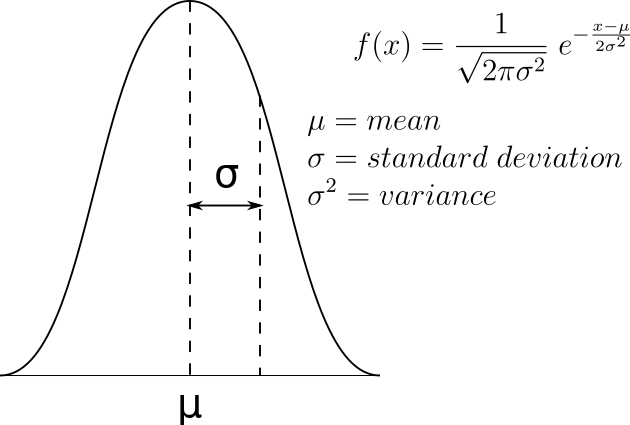

There are two parameters associated with the normal distribution. Mean value (μ) and standard deviation (σ). These two parameters are connected to a probability density function that describes a Gaussian distribution. The normal distribution is symmetrical about its mean. Knowing the normal distribution would be helpful in understanding parametric tests.

There is a simpler roadmap for choosing an appropriate statistical test.

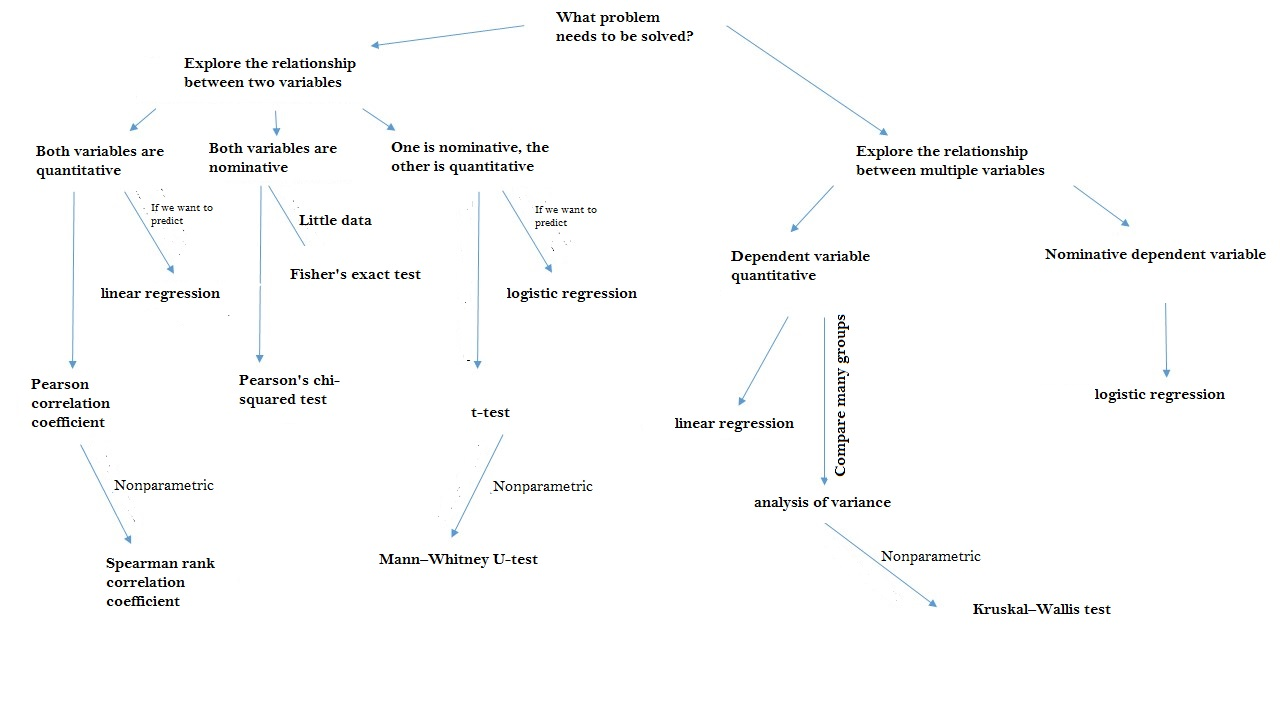

In [ ]:
num_col=['Influence score ', 'Followers ', 'Total Likes', 'Posts']

For an example of checking for the normality of the distribution, we will conduct the Shapiro-Wilk test. This test is carried out to test for the normality of the distribution of the feature and further selection of a statistical test for testing hypotheses.

In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in num_col:
	stat, p = shapiro(train[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

For example, let's compare quantitative variables with the rank of a country. Since one variable is a rank variable, and the second is a non-normally distributed quantitative variable, we will use the Mann-Whitney U-test. Let's set the null hypothesis that there is no statistical difference between the quantitative variable and the rank of the country.

In [ ]:
import scipy.stats

# u : Mann-Whitney test statistic
# p : p-value
for feature in num_col:
  u, p = scipy.stats.mannwhitneyu(train['Country_rank'], train[feature])
  print('With',feature)
  print('Mann-Whitney test statistic:',u)
  print('p-value:',p)

Reject the null hypothesis!

Let us construct a Spearman correlation matrix between the studied parameters. Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear.

In [ ]:
correlation = train.corr()
print(correlation['Total Likes'].sort_values(ascending = False),'\n')

In [ ]:
k= 10
cols = correlation.nlargest(k,'Total Likes')['Total Likes'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

There is a moderate correlation between the number of followers and the number of likes.

Statistical tests (non-parametric) are done, but what if we want to run parametric ones? Convert to normal distribution. There are many ways to convert to a normal distribution such as taking logarithms, increasing the sample size, changing the data resolution, removing outliers, removing distribution tails, various Box-Cox transformations. The most important rule to remember is that the prediction results must be interpretable (the interpretation of the logarithm of the value is simple and convenient).

<a id="title-six"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 10px; color:black'><center>RECOMENDATIONS</center></h1>

Get likes and followers on Instagram. 10 recomendations to promote your Instagram profile without fraudulent tricks.

* Take care of the content. The basis of success on Instagram is interesting photos, so work wisely with the content that you offer to your followers.
* Edit pictures properly. Don't put dozens of filters on your photo. Decide on the main download program and a couple of satellite applications. You can also find many photo editing tools on Instagram.
* Design your profile. Don't forget that it's important not only to take good photos, but also to position yourself correctly. Link your Instagram accounts to other social networks. Fill in information about yourself: here you can specify the name, field of activity, model of the camera or smartphone that inspires you to quote.
* Competently use hashtags. A very simple and quick way to promote yourself on Instagram is to use hashtags correctly. Think about what keywords you can link to your photo.
* Communicate with your audience. Pay attention to your commenters, thank them and rate their profile. People love to be talked to, and Instagram is no exception.
* Do not be lazy to sign photos. A detailed description can advantageously attack a photo. Have you attended a concert? Share your impressions. Did you post the original breakfast photo? Tell us how you came up with the recipe. The myth that people on the Internet do not like to read is relevant only for uninteresting texts.
* Mark geolocations. Instagram users evaluate searches not only by hashtags, but also by interesting places. Do not be afraid of surveillance by the secret services: they already know everything about you.
* Use Instagram Stories. Instagram Stories allows you to post photos and videos up to 15 seconds. Images in "stories" are arranged vertically, you can draw on them, add filters, subscriptions and emoji.
* Upload interesting videos. Instagram supports posting videos up to one minute long. The video appears in the dynamism feed and gives subscribers the opportunity to hear your voice.
* Do not overdo it with attention to other people's profiles. People like, if you think that you consider them your favorite photos, interesting, then it does not imply a mandatory subscription, likes and comments. But do not overdo it: it is unlikely that someone will be pleased to have continuous advertising accounts among subscribers.


# Thanks for viewing my kernel! Rate and leave comments on the work that you would like to explore and add to my work!